In [1]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime


# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None


In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
%%R

library(ggplot2)


In [6]:
# %%R

# # !install EBImage
# # source("https://bioconductor.org/biocLite.R")
# # biocLite("EBImage")
# !install ggimage
# !install.packages("ggimage")

In [7]:
df_sunshine_year=pd.read_csv("sunshine_year.csv")

In [8]:
df_sunshine_year.head()

,Unnamed: 0.1,key_0,Unnamed: 0,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.,Continent,country_url,city_url,naming_country,naming_city,sun_country,sun_city,dec_url_city,dec_raw_html,dec_soup_doc,dec_duration,june_url_city,june_raw_html,june_soup_doc,june_duration,june_dtime,dec_dtime,daylight_diff,year_url_city,Date,Sunrise,Sunset,Day length,all_months_url
0,0,https://www.sunrise-and-sunset.com/en/sun/ivor...,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"1 January 2023, Sunday",06:34,18:19,11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...
1,1,https://www.sunrise-and-sunset.com/en/sun/ivor...,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"2 January 2023, Monday",06:35,18:20,11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...
2,2,https://www.sunrise-and-sunset.com/en/sun/ivor...,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"3 January 2023, Tuesday",06:35,18:20,11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...
3,3,https://www.sunrise-and-sunset.com/en/sun/ivor...,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"4 January 2023, Wednesday",06:36,18:21,11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...
4,4,https://www.sunrise-and-sunset.com/en/sun/ivor...,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/su

In [9]:
df_sunshine_year.columns

Index(['Unnamed: 0.1', 'key_0', 'Unnamed: 0', 'Country', 'City', 'Jan', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Year', 'Ref.', 'Continent', 'country_url', 'city_url',
       'naming_country', 'naming_city', 'sun_country', 'sun_city',
       'dec_url_city', 'dec_raw_html', 'dec_soup_doc', 'dec_duration',
       'june_url_city', 'june_raw_html', 'june_soup_doc', 'june_duration',
       'june_dtime', 'dec_dtime', 'daylight_diff', 'year_url_city', 'Date',
       'Sunrise', 'Sunset', 'Day length', 'all_months_url'],
      dtype='object')

In [10]:
# df_sunshine_year.groupby('City').daylight_diff.mean().hist()

<AxesSubplot: >

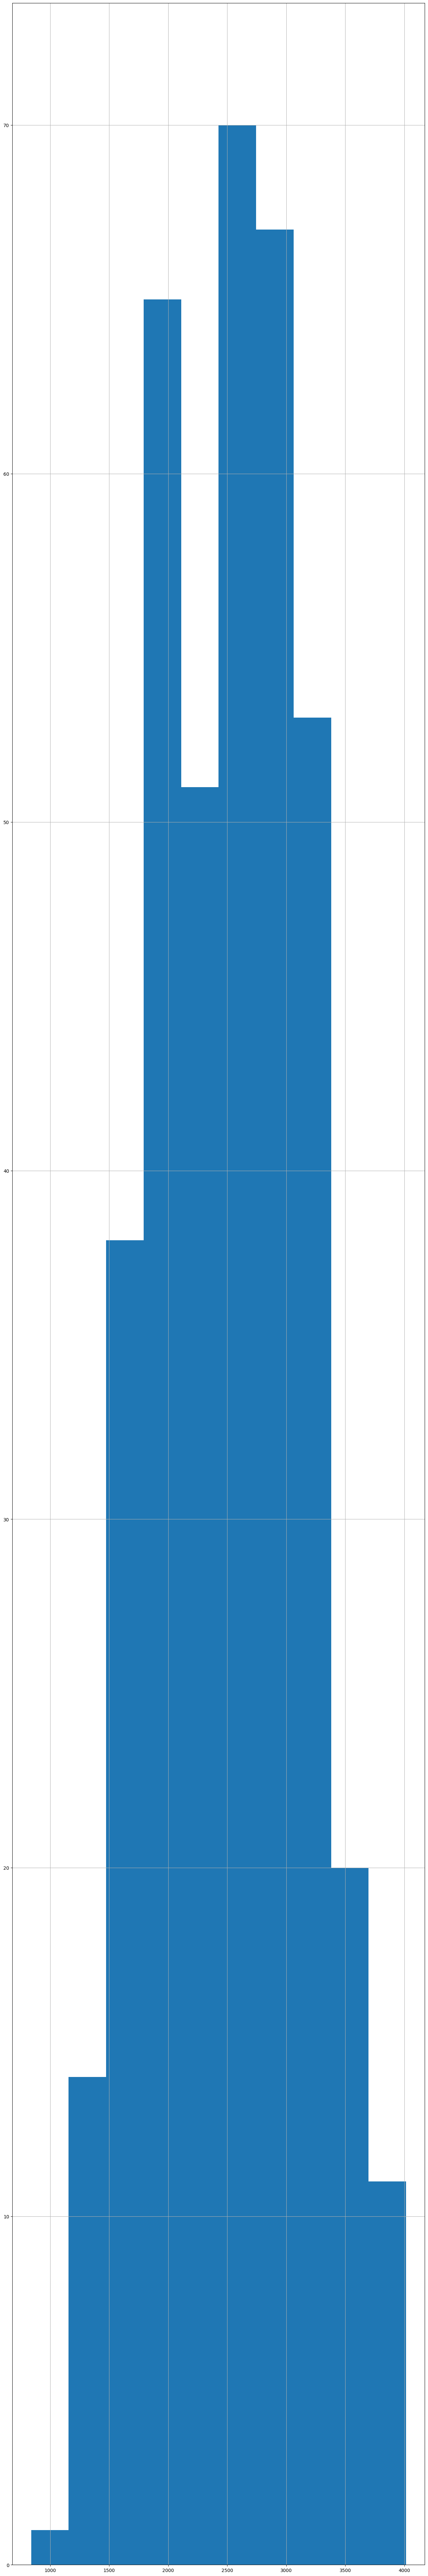

In [11]:
df_sunshine_year.groupby('City').Year.mean().hist()

In [12]:
%%R

# EXAMPLE R CELL
df_r_sunshine = read_csv('sunshine_year.csv')


New names:
• `` -> `...1`
Rows: 108869 Columns: 43
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (26): key_0, Country, City, Ref., Continent, country_url, city_url, nam...
dbl  (15): ...1, Unnamed: 0, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oc...
dttm  (2): june_dtime, dec_dtime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
%%R

df_r_sunshine

# A tibble: 108,869 × 43
    ...1 key_0   Unnam…¹ Country City    Jan   Feb   Mar   Apr   May   Jun   Jul
   <dbl> <chr>     <dbl> <chr>   <chr> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1     0 https:…       0 Ivory … Gagn…   183   180   196   188   181   118    97
 2     1 https:…       0 Ivory … Gagn…   183   180   196   188   181   118    97
 3     2 https:…       0 Ivory … Gagn…   183   180   196   188   181   118    97
 4     3 https:…       0 Ivory … Gagn…   183   180   196   188   181   118    97
 5     4 https:…       0 Ivory … Gagn…   183   180   196   188   181   118    97
 6     5 https:…       0 Ivory … Gagn…   183   180   196   188   181   118    97
 7     6 https:…       0 Ivory … Gagn…   183   180   196   188   181   118    97
 8     7 https:…       0 Ivory … Gagn…   183   180   196   188   181   118    97
 9     8 https:…       0 Ivory … Gagn…   183   180   196   188   181   118    97
10     9 https:…       0 Ivory … Gagn…   183   180   196   188   181   118    97
# …

In [14]:
%%R

# EXAMPLE R CELL
df_r_nrb_sunshine = read_csv('nairobi_sunshine_wikipedia.csv')


Rows: 1 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country, City, Ref., Continent
dbl (12): Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec
num  (1): Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [197]:
%%R

arrows2 <- 
  tibble(
    x1 = c(2600),
    x2 = c(2518.232),
    y1 = c(1.52), 
    y2 = c(1.52)
  )

arrows2

# A tibble: 1 × 4
     x1    x2    y1    y2
  <dbl> <dbl> <dbl> <dbl>
1  2600 2518.  1.52  1.52


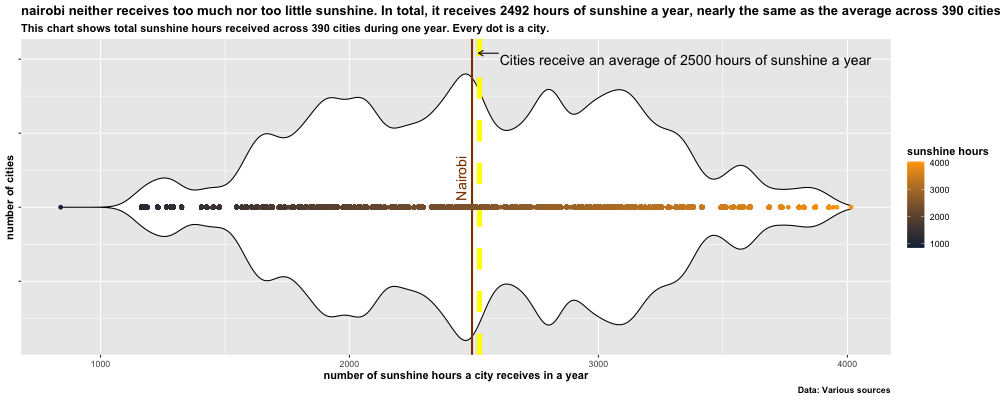

In [201]:
%%R -w 1000 -h 400

set.seed(12345)
library(ggplot2)
library(ggbeeswarm)


ggplot(df_r_sunshine) + 
    aes(x=Year, y=1) +
#     geom_quasirandom((aes(colour = Year)) + scale_colour_gradient(low = "blue")) +

#     geom_point(aes(colour = Year)) + scale_colour_gradient(high = "blue")+
    geom_violin(color='black')+ 
#     geom_point((aes(colour = Year)) + scale_colour_gradient(low = "blue"))+ 

    geom_vline(linetype = "dashed", aes(xintercept=mean(df_r_sunshine$Year)), color='yellow', size=2.5)+
    geom_vline(aes(xintercept=df_r_nrb_sunshine$Year), color='#8B4000', size=1)+
    annotate("text", x=3350, y=1.5, label="Cities receive an average of 2500 hours of sunshine a year", angle=360, size=5, color="black") +
    geom_curve(
        data = arrows2, aes(x = x1, y = y1, xend = x2, yend = y2),
        arrow = arrow(length = unit(0.08, "inch")), size = 0.5,
        color = "black", curvature = 0)+
#     annotate("text", x=1250, y=-0.075, label="too little sunshine", angle=360, size=5, color="blue") +
#     annotate("text", x=3750, y=-0.075, label="too much sunshine", angle=360, size=5, color="red") +


#     facet_wrap(vars(borough)) + 
    labs(title = "nairobi neither receives too much nor too little sunshine. In total, it receives 2492 hours of sunshine a year, nearly the same as the average across 390 cities",
              subtitle = "This chart shows total sunshine hours received across 390 cities during one year. Every dot is a city.",
              caption = "Data: Various sources") +
    xlab("number of sunshine hours a city receives in a year") +
    ylab("number of cities") +
    geom_text(data=df_r_nrb_sunshine, x=2450, y=1.1, angle=90, color="#8B4000", face = "bold", size=5, aes(label=paste(City)))+
    geom_quasirandom()+
    aes(colour = Year) + 
    scale_colour_gradient(high = "orange", name="sunshine hours") +
    theme(title = element_text(face = "bold"))+
      theme(
#           axis.title.y=element_blank(),
          axis.text.y=element_blank(),  #remove y axis labels
#           axis.ticks.y=element_blank()  #remove y axis ticks
            )


# ggsave("nairobibrownsunshine.png")

#consider adding names of too little or too much sunshine
#bottom corners
#too much sunshine
#too little sunshine

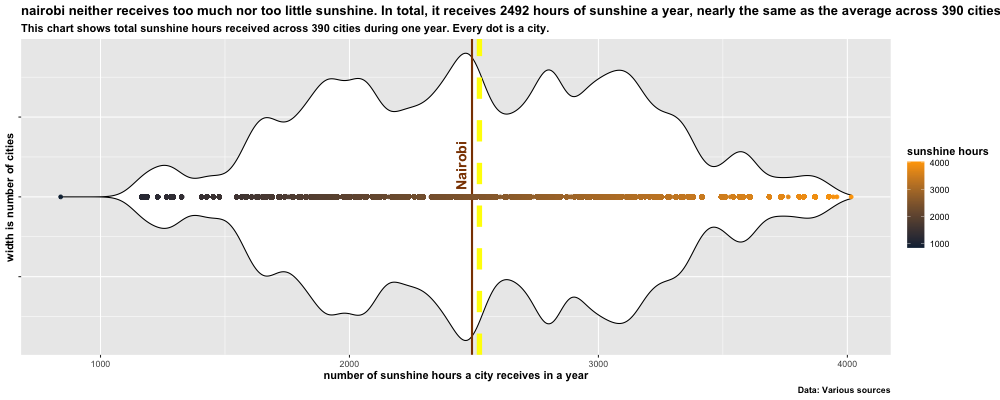

In [211]:
%%R -w 1000 -h 400

set.seed(12345)
library(ggplot2)
library(ggbeeswarm)


ggplot(df_r_sunshine) + 
    aes(x=Year, y=1) +
#     geom_quasirandom((aes(colour = Year)) + scale_colour_gradient(low = "blue")) +

#     geom_point(aes(colour = Year)) + scale_colour_gradient(high = "blue")+
    geom_violin(color='black')+ 
#     geom_point((aes(colour = Year)) + scale_colour_gradient(low = "blue"))+ 

    geom_vline(linetype = "dashed", aes(xintercept=mean(df_r_sunshine$Year)), color='yellow', size=2.5)+
    geom_vline(aes(xintercept=df_r_nrb_sunshine$Year), color='#8B4000', size=1)+
#     annotate("text", x=3350, y=1.5, label="Cities receive an average of 2500 hours of sunshine a year", angle=360, size=5, color="black") +
#     geom_curve(
#         data = arrows2, aes(x = x1, y = y1, xend = x2, yend = y2),
#         arrow = arrow(length = unit(0.08, "inch")), size = 0.5,
#         color = "black", curvature = 0)+
# #     annotate("text", x=1250, y=-0.075, label="too little sunshine", angle=360, size=5, color="blue") +
# #     annotate("text", x=3750, y=-0.075, label="too much sunshine", angle=360, size=5, color="red") +


#     facet_wrap(vars(borough)) + 
    labs(title = "nairobi neither receives too much nor too little sunshine. In total, it receives 2492 hours of sunshine a year, nearly the same as the average across 390 cities",
              subtitle = "This chart shows total sunshine hours received across 390 cities during one year. Every dot is a city.",
              caption = "Data: Various sources") +
    xlab("number of sunshine hours a city receives in a year") +
    ylab("width is number of cities") +
    geom_text(data=df_r_nrb_sunshine, x=2450, y=1.1, angle=90, color="#8B4000", fontface = "bold", size=5, aes(label=paste(City)))+
    geom_quasirandom()+
    aes(colour = Year) + 
    scale_colour_gradient(high = "orange", name="sunshine hours") +
    theme(title = element_text(face = "bold"))+
      theme(
#           axis.title.y=element_blank(),
          axis.text.y=element_blank(),  #remove y axis labels
#           axis.ticks.y=element_blank()  #remove y axis ticks
            )


# ggsave("nairobibrownsunshine2.png")

#consider adding names of too little or too much sunshine
#bottom corners
#too much sunshine
#too little sunshine

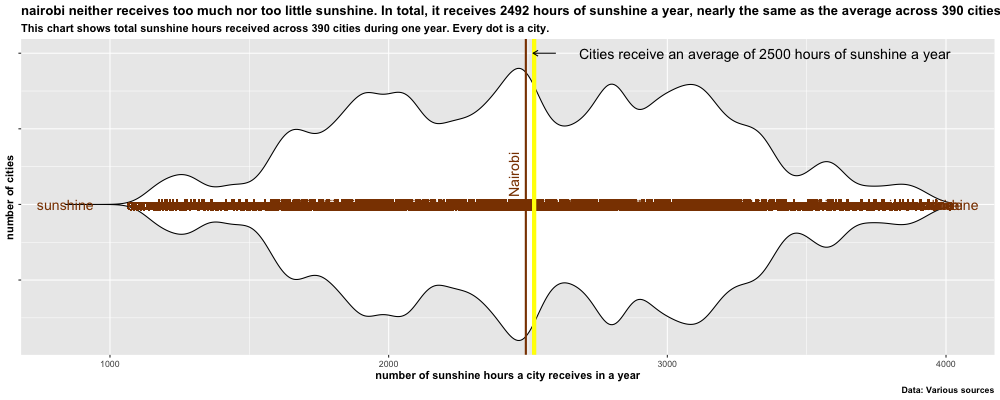

In [133]:
%%R -w 1000 -h 400

set.seed(12345)
library(ggplot2)
library(ggbeeswarm)


ggplot(df_r_sunshine) + 
    aes(x=Year, y=1) +
#     geom_quasirandom((aes(colour = Year)) + scale_colour_gradient(low = "blue")) +

#     geom_point(aes(colour = Year)) + scale_colour_gradient(high = "blue")+
    geom_violin(color='black')+ 
#     geom_point((aes(colour = Year)) + scale_colour_gradient(low = "blue"))+ 
    geom_text(angle=0, color="#8B4000", face = "bold", size=5, aes(label="sunshine", color=Year))+
    scale_colour_gradient(high = "orange", name="sunshine hours") +
    geom_vline(aes(xintercept=mean(df_r_sunshine$Year)), color='yellow', size=2)+
    geom_vline(aes(xintercept=df_r_nrb_sunshine$Year), color='#8B4000', size=1)+
    annotate("text", x=3350, y=1.5, label="Cities receive an average of 2500 hours of sunshine a year", angle=360, size=5, color="black") +
    geom_curve(
        data = arrows2, aes(x = x1, y = y1, xend = x2, yend = y2),
        arrow = arrow(length = unit(0.08, "inch")), size = 0.5,
        color = "black", curvature = 0)+
#     annotate("text", x=1250, y=-0.075, label="too little sunshine", angle=360, size=5, color="blue") +
#     annotate("text", x=3750, y=-0.075, label="too much sunshine", angle=360, size=5, color="red") +


#     facet_wrap(vars(borough)) + 
    labs(title = "nairobi neither receives too much nor too little sunshine. In total, it receives 2492 hours of sunshine a year, nearly the same as the average across 390 cities",
              subtitle = "This chart shows total sunshine hours received across 390 cities during one year. Every dot is a city.",
              caption = "Data: Various sources") +
    xlab("number of sunshine hours a city receives in a year") +
    ylab("number of cities") +
    geom_text(data=df_r_nrb_sunshine, x=2450, y=1.1, angle=90, color="#8B4000", face = "bold", size=5, aes(label=paste(City)))+
#     geom_quasirandom()+
#     aes(colour = Year) + 
    theme(title = element_text(face = "bold"))+
      theme(
#           axis.title.y=element_blank(),
          axis.text.y=element_blank(),  #remove y axis labels
#           axis.ticks.y=element_blank()  #remove y axis ticks
            )





#consider adding names of too little or too much sunshine
#bottom corners
#too much sunshine
#too little sunshine

In [17]:
%%R

arrows <- 
  tibble(
    x1 = c(2812, 1500, 3500),
    x2 = c(2518.232, 1000, 4000),
    y1 = c(1.5, -0.25, -0.25), 
    y2 = c(1.45, -0.25, -0.25)
  )

arrows

# A tibble: 3 × 4
     x1    x2    y1    y2
  <dbl> <dbl> <dbl> <dbl>
1  2812 2518.  1.5   1.45
2  1500 1000  -0.25 -0.25
3  3500 4000  -0.25 -0.25


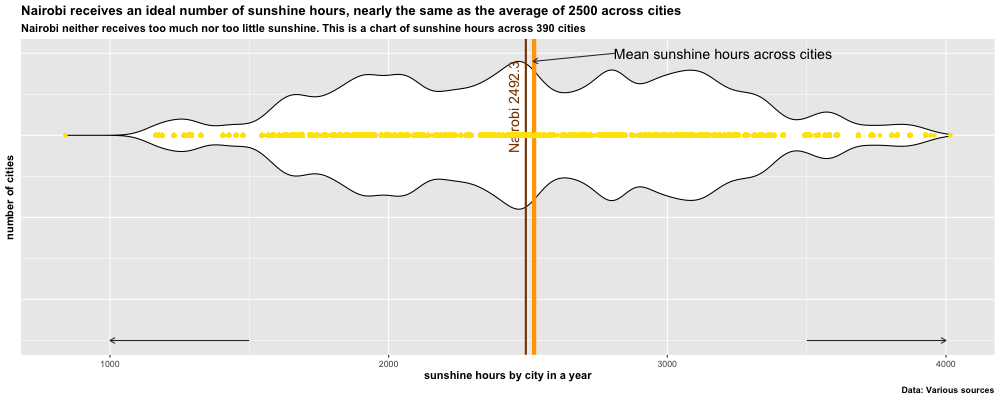

In [18]:
%%R -w 1000 -h 400

set.seed(12345)
library(ggplot2)
library(ggbeeswarm)


ggplot(df_r_sunshine) + 
    aes(x=Year, y=1) +
    geom_violin(color='black')+ 
#     geom_point()+ 
    geom_vline(aes(xintercept=mean(df_r_sunshine$Year)), color='orange', size=2)+
    geom_vline(aes(xintercept=df_r_nrb_sunshine$Year), color='#8B4000', size=1)+
    annotate("text", x=3200, y=1.5, label="Mean sunshine hours across cities", angle=360, size=5, color="black") +
    geom_curve(
        data = arrows, aes(x = x1, y = y1, xend = x2, yend = y2),
        arrow = arrow(length = unit(0.08, "inch")), size = 0.5,
        color = "gray20", curvature = 0)+


#     facet_wrap(vars(borough)) + 
    labs(title = "Nairobi receives an ideal number of sunshine hours, nearly the same as the average of 2500 across cities",
              subtitle = "Nairobi neither receives too much nor too little sunshine. This is a chart of sunshine hours across 390 cities",
              caption = "Data: Various sources") +
    xlab("sunshine hours by city in a year") +
    ylab("number of cities") +
    geom_text(data=df_r_nrb_sunshine, x=2450, y=1.175, angle=90, color="#8B4000", size=5, aes(label=paste(City, Year)))+
    geom_quasirandom(color='#ffe400') +
    theme(title = element_text(face = "bold"))+
      theme(
#           axis.title.y=element_blank(),
          axis.text.y=element_blank(),  #remove y axis labels
          axis.ticks.y=element_blank()  #remove y axis ticks
            )

# ggsave("nairobi_sunshine_violin2.png")

#consider adding names of too little or too much sunshine
#bottom corners
#too much sunshine
#too little sunshine

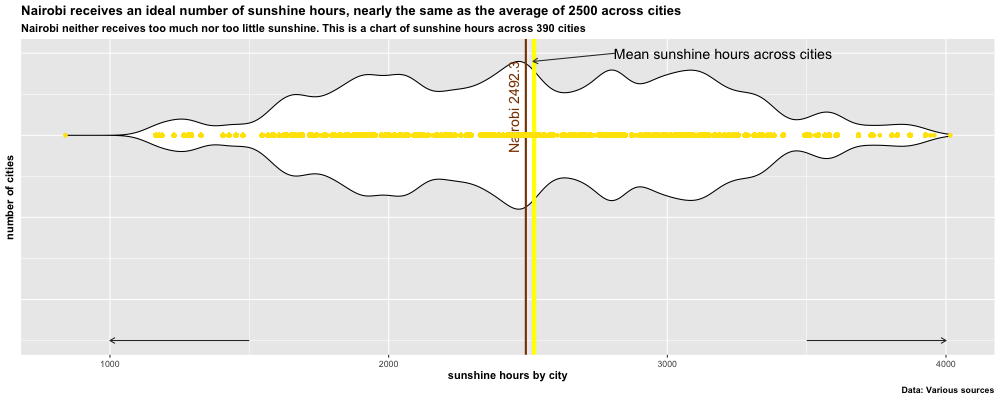

In [57]:
%%R -w 1000 -h 400


set.seed(12345)
library(ggplot2)
library(ggbeeswarm)

# tiff("test.png", units="in", width=5, height=5, res=300)

plot<-ggplot(df_r_sunshine) + 
    aes(x=Year, y=1) +
    geom_violin(color='black')+ 
#     geom_point()+ 
    geom_vline(aes(xintercept=mean(df_r_sunshine$Year)), color='yellow', size=2)+
    geom_vline(aes(xintercept=df_r_nrb_sunshine$Year), color='#8B4000', size=1)+
    annotate("text", x=3200, y=1.5, label="Mean sunshine hours across cities", angle=360, size=5, color="black") +
    geom_curve(
        data = arrows, aes(x = x1, y = y1, xend = x2, yend = y2),
        arrow = arrow(length = unit(0.08, "inch")), size = 0.5,
        color = "gray20", curvature = 0)+


#     facet_wrap(vars(borough)) + 
    labs(title = "Nairobi receives an ideal number of sunshine hours, nearly the same as the average of 2500 across cities",
              subtitle = "Nairobi neither receives too much nor too little sunshine. This is a chart of sunshine hours across 390 cities",
              caption = "Data: Various sources") +
    xlab("sunshine hours by city") +
    ylab("number of cities") +
    geom_text(data=df_r_nrb_sunshine, x=2450, y=1.175, angle=90, color="#8B4000", size=5, aes(label=paste(City, Year)))+
    geom_quasirandom(color='#ffe400') +
    theme(title = element_text(face = "bold"))+
      theme(
#           axis.title.y=element_blank(),
          axis.text.y=element_blank(),  #remove y axis labels
          axis.ticks.y=element_blank()  #remove y axis ticks
            )
    print(plot)
# dev.off()


In [20]:
list_temp_tables=pd.read_html("https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature")

In [21]:
df_full_temp_table=pd.concat(list_temp_tables)
df_full_temp_table

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.
0,Algeria,Algiers,11.2 (52.2),11.9 (53.4),12.8 (55.0),14.7 (58.5),17.7 (63.9),21.3 (70.3),24.6 (76.3),25.2 (77.4),23.2 (73.8),19.4 (66.9),15.2 (59.4),12.1 (53.8),17.4 (63.3),[1]
1,Algeria,Tamanrasset,12.8 (55.0),15.0 (59.0),18.1 (64.6),22.2 (72.0),26.1 (79.0),28.9 (84.0),28.7 (83.7),28.2 (82.8),26.5 (79.7),22.4 (72.3),17.3 (63.1),13.9 (57.0),21.7 (71.1),[2]
2,Algeria,Reggane,16.0 (60.8),18.2 (64.8),23.1 (73.6),27.9 (82.2),32.2 (90.0),36.4 (97.5),39.8 (103.6),38.4 (101.1),35.5 (95.9),29.2 (84.6),22.0 (71.6),17.8 (64.0),28.3 (82.9),[3]
3,Angola,Luanda,26.7 (80.1),28.5 (83.3),28.6 (83.5),28.2 (82.8),27.0 (80.6),23.9 (75.0),22.1 (71.8),22.1 (71.8),23.5 (74.3),25.2 (77.4),26.7 (80.1),26.9 (80.4),25.8 (78.4),[4]
4,Benin,Cotonou,27.3 (81.1),28.5 (83.3),28.9 (84.0),28.6 (83.5),27.8 (82.0),26.5 (79.7),25.8 (78.4),25.6 (78.1),26.0 (78.8),26.7 (80.1),27.6 (81.7),27.3 (81.1),27.2 (81.0),[5]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,Peru,Lima,22.1 (71.8),22.7 (72.9),22.2 (72.0),20.6 (69.1),18.8 (65.8),17.5 (63.5),16.7 (62.1),16.2 (61.2),16.4 (61.5),17.3 (63.1),18.7 (65.7),20.7 (69.3),19.2 (66.6),[389]
53,Peru,Piura,26.8 (80.2),27.8 (82.0),27.8 (82.0),26.6 (79.9),24.5 (76.1),22.9 (73.2),21.8 (71.2),21.9 (71.4),22.3 (72.1),22.9 (73.2),23.6 (74.5),25.2 (77.4),24.5 (76.1),[390]
54,Suriname,Paramaribo,26.0 (78.8),26.0 (78.8),26.2 (79.2),26.7 (80.1),26.5 (79.7),26.5 (79.7),26.7 (80.1),27.4 (81.3),27.8 (82.0),27.9 (82.2),27.3 (81.1),26.4 (79.5),26.8 (80.2),[391]
55,Uruguay,Montevideo,23.0 (73.4),22.5 (72.5),20.6 (69.1),17.2 (63.0),14.0 (57.2),11.1 (52.0),10.9 (51.6),11.7 (53.1),13.4 (56.1),16.0 (60.8),18.6 (65.5),21.3 (70.3),16.7 (62.1),[392]


In [22]:
df_full_temp_table['city_temp_lower']=df_full_temp_table.City.str.lower()

In [23]:
df_full_temp_table['country_temp_lower']=df_full_temp_table.Country.str.lower()

In [24]:
df_full_temp_table.head()
# df_full_temp_table.Country=df_full_temp_table.country_temp

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.,city_temp_lower,country_temp_lower
0,Algeria,Algiers,11.2 (52.2),11.9 (53.4),12.8 (55.0),14.7 (58.5),17.7 (63.9),21.3 (70.3),24.6 (76.3),25.2 (77.4),23.2 (73.8),19.4 (66.9),15.2 (59.4),12.1 (53.8),17.4 (63.3),[1],algiers,algeria
1,Algeria,Tamanrasset,12.8 (55.0),15.0 (59.0),18.1 (64.6),22.2 (72.0),26.1 (79.0),28.9 (84.0),28.7 (83.7),28.2 (82.8),26.5 (79.7),22.4 (72.3),17.3 (63.1),13.9 (57.0),21.7 (71.1),[2],tamanrasset,algeria
2,Algeria,Reggane,16.0 (60.8),18.2 (64.8),23.1 (73.6),27.9 (82.2),32.2 (90.0),36.4 (97.5),39.8 (103.6),38.4 (101.1),35.5 (95.9),29.2 (84.6),22.0 (71.6),17.8 (64.0),28.3 (82.9),[3],reggane,algeria
3,Angola,Luanda,26.7 (80.1),28.5 (83.3),28.6 (83.5),28.2 (82.8),27.0 (80.6),23.9 (75.0),22.1 (71.8),22.1 (71.8),23.5 (74.3),25.2 (77.4),26.7 (80.1),26.9 (80.4),25.8 (78.4),[4],luanda,angola
4,Benin,Cotonou,27.3 (81.1),28.5 (83.3),28.9 (84.0),28.6 (83.5),27.8 (82.0),26.5 (79.7),25.8 (78.4),25.6 (78.1),26.0 (78.8),26.7 (80.1),27.6 (81.7),27.3 (81.1),27.2 (81.0),[5],cotonou,benin


In [25]:
df_full_temp_table = df_full_temp_table.add_suffix('_temp')
df_full_temp_table.head()


,Country_temp,City_temp,Jan_temp,Feb_temp,Mar_temp,Apr_temp,May_temp,Jun_temp,Jul_temp,Aug_temp,Sep_temp,Oct_temp,Nov_temp,Dec_temp,Year_temp,Ref._temp,city_temp_lower_temp,country_temp_lower_temp
0,Algeria,Algiers,11.2 (52.2),11.9 (53.4),12.8 (55.0),14.7 (58.5),17.7 (63.9),21.3 (70.3),24.6 (76.3),25.2 (77.4),23.2 (73.8),19.4 (66.9),15.2 (59.4),12.1 (53.8),17.4 (63.3),[1],algiers,algeria
1,Algeria,Tamanrasset,12.8 (55.0),15.0 (59.0),18.1 (64.6),22.2 (72.0),26.1 (79.0),28.9 (84.0),28.7 (83.7),28.2 (82.8),26.5 (79.7),22.4 (72.3),17.3 (63.1),13.9 (57.0),21.7 (71.1),[2],tamanrasset,algeria
2,Algeria,Reggane,16.0 (60.8),18.2 (64.8),23.1 (73.6),27.9 (82.2),32.2 (90.0),36.4 (97.5),39.8 (103.6),38.4 (101.1),35.5 (95.9),29.2 (84.6),22.0 (71.6),17.8 (64.0),28.3 (82.9),[3],reggane,algeria
3,Angola,Luanda,26.7 (80.1),28.5 (83.3),28.6 (83.5),28.2 (82.8),27.0 (80.6),23.9 (75.0),22.1 (71.8),22.1 (71.8),23.5 (74.3),25.2 (77.4),26.7 (80.1),26.9 (80.4),25.8 (78.4),[4],luanda,angola
4,Benin,Cotonou,27.3 (81.1),28.5 (83.3),28.9 (84.0),28.6 (83.5),27.8 (82.0),26.5 (79.7),25.8 (78.4),25.6 (78.1),26.0 (78.8),26.7 (80.1),27.6 (81.7),27.3 (81.1),27.2 (81.0),[5],cotonou,benin


In [26]:
df_full_temp_table.to_csv("full_temp_table.csv")

In [27]:
df_full_temp_table.columns.str.lower()
df_full_temp_table.columns

Index(['Country_temp', 'City_temp', 'Jan_temp', 'Feb_temp', 'Mar_temp',
       'Apr_temp', 'May_temp', 'Jun_temp', 'Jul_temp', 'Aug_temp', 'Sep_temp',
       'Oct_temp', 'Nov_temp', 'Dec_temp', 'Year_temp', 'Ref._temp',
       'city_temp_lower_temp', 'country_temp_lower_temp'],
      dtype='object')

In [28]:
df_sunshine_year=df_sunshine_year.drop(columns='key_0')

In [29]:
df_sunshine_year.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Country', 'City', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year',
       'Ref.', 'Continent', 'country_url', 'city_url', 'naming_country',
       'naming_city', 'sun_country', 'sun_city', 'dec_url_city',
       'dec_raw_html', 'dec_soup_doc', 'dec_duration', 'june_url_city',
       'june_raw_html', 'june_soup_doc', 'june_duration', 'june_dtime',
       'dec_dtime', 'daylight_diff', 'year_url_city', 'Date', 'Sunrise',
       'Sunset', 'Day length', 'all_months_url'],
      dtype='object')

In [30]:
df_sunshine_year['Day length']

0         11:44
1         11:44
2         11:44
3         11:44
4         11:45
          ...  
108864    15:40
108865    15:40
108866    15:39
108867    15:39
108868    15:38
Name: Day length, Length: 108869, dtype: object

In [31]:
# df_sunshine_year = pd.merge(df, df_yearly_tables, left_on=df.year_url_city, right_on=df_yearly_tables.all_months_url, how='left')
# df_sunshine_year.head()

df_sunshine_temp = pd.merge(df_sunshine_year, df_full_temp_table, left_on=df_sunshine_year.city_url, right_on=df_full_temp_table.city_temp_lower_temp, how='left')
df_sunshine_temp.head()

,key_0,Unnamed: 0.1,Unnamed: 0,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.,Continent,country_url,city_url,naming_country,naming_city,sun_country,sun_city,dec_url_city,dec_raw_html,dec_soup_doc,dec_duration,june_url_city,june_raw_html,june_soup_doc,june_duration,june_dtime,dec_dtime,daylight_diff,year_url_city,Date,Sunrise,Sunset,Day length,all_months_url,Country_temp,City_temp,Jan_temp,Feb_temp,Mar_temp,Apr_temp,May_temp,Jun_temp,Jul_temp,Aug_temp,Sep_temp,Oct_temp,Nov_temp,Dec_temp,Year_temp,Ref._temp,city_temp_lower_temp,country_temp_lower_temp
0,gagnoa,0,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"1 January 2023, Sunday",06:34,18:19,11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,Ivory Coast,Gagnoa,26 (79),27 (81),27 (81),27 (81),27 (81),26 (79),25 (77),25 (77),25 (77),26 (79),26 (79),26 (79),26 (79),[43],gagnoa,ivory coast
1,gagnoa,1,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"2 January 2023, Monday",06:35,18:20,11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,Ivory Coast,Gagnoa,26 (79),27 (81),27 (81),27 (81),27 (81),26 (79),25 (77),25 (77),25 (77),26 (79),26 (79),26 (79),26 (79),[43],gagnoa,ivory coast
2,gagnoa,2,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"3 January 2023, Tuesday",06:35,18:20,11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,Ivory Coast,Gagnoa,26 (79),27 (81),27 (81),27 (81),27 (81),26 (79),25 (77),25 (77),25 (77),26 (79),26 (79),26 (79),26 (79),[43],gagnoa,ivory coast
3,gagnoa,3,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"4 January 2023, Wednesday",06:36,18:21,11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,Ivory Coast,Gagnoa,26 (79),27 (81),27 (81),27 (81),27 (81),26 (79),25 (77),25 (77),25 (77),26 (79),26 (79),26 (79),26 (79),[43],gagnoa,ivory coast
4,gagnoa,4,0,Ivory Coast,Gag

In [32]:
df_sunshine_temp.to_csv("sunshine_temp_table.csv")

In [33]:
df_nairobi_n_temp_cities=pd.read_csv("nrb_n_cities.csv")

In [34]:
df_nairobi_n_temp_cities.head()

,City_temp,January,February,March,April,May,June,July,August,September,October,November,December
0,N'Djamena,23.3,26.9,30.4,33.8,33.5,31.0,28.2,26.5,27.8,29.2,27.3,24.0
1,Naha,17.0,17.1,18.9,21.4,24.0,26.8,28.9,28.7,27.6,25.2,22.1,18.7
2,Nairobi,18.0,18.8,19.4,19.2,17.8,16.3,15.6,15.9,17.3,18.5,18.4,18.1
3,Nakhon Ratchasima,24.3,26.9,28.9,30.0,29.1,29.1,28.6,28.1,27.4,26.7,25.4,23.6
4,Napier,19.5,19.4,17.7,15.0,12.4,10.0,9.4,10.3,12.3,14.3,16.1,18.4


In [35]:
# df_nairobi_n_temp_cities.plot()

df_sunshine_temp.columns

Index(['key_0', 'Unnamed: 0.1', 'Unnamed: 0', 'Country', 'City', 'Jan', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Year', 'Ref.', 'Continent', 'country_url', 'city_url',
       'naming_country', 'naming_city', 'sun_country', 'sun_city',
       'dec_url_city', 'dec_raw_html', 'dec_soup_doc', 'dec_duration',
       'june_url_city', 'june_raw_html', 'june_soup_doc', 'june_duration',
       'june_dtime', 'dec_dtime', 'daylight_diff', 'year_url_city', 'Date',
       'Sunrise', 'Sunset', 'Day length', 'all_months_url', 'Country_temp',
       'City_temp', 'Jan_temp', 'Feb_temp', 'Mar_temp', 'Apr_temp', 'May_temp',
       'Jun_temp', 'Jul_temp', 'Aug_temp', 'Sep_temp', 'Oct_temp', 'Nov_temp',
       'Dec_temp', 'Year_temp', 'Ref._temp', 'city_temp_lower_temp',
       'country_temp_lower_temp'],
      dtype='object')

In [36]:
%%R 

df_sunshine_temp=read_csv("sunshine_temp_table.csv")

New names:
• `` -> `...1`
Rows: 109234 Columns: 62
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (44): key_0, Country, City, Ref., Continent, country_url, city_url, nam...
dbl  (16): ...1, Unnamed: 0.1, Unnamed: 0, Jan, Feb, Mar, Apr, May, Jun, Jul...
dttm  (2): june_dtime, dec_dtime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [37]:
df_sunshine_temp.daylight_diff_no_days=df_sunshine_temp.daylight_diff.str.replace("0 days ", "")
df_sunshine_temp.daylight_diff_no_days

0         00:42:00
1         00:42:00
2         00:42:00
3         00:42:00
4         00:42:00
            ...   
109229    07:04:00
109230    07:04:00
109231    07:04:00
109232    07:04:00
109233    07:04:00
Name: daylight_diff, Length: 109234, dtype: object

In [38]:
# df_sunshine_temp ['day_diff_datetime'] = df_sunshine_temp.daylight_diff.apply(lambda x: x.to_datetime)

# df_sunshine_temp ['day_diff_datetime'] = df_sunshine_temp.daylight_diff.apply(lambda x: x.to_datetime)

# type(df_sunshine_temp.daylight_diff[1])

# df_sunshine_temp.daylight_diff.sample(10)



#for june_dec_duration by scraping

def dtime_daylight_diff(x):
    try:
        duration_dtime = datetime.strptime(x, "%H:%M:%S")
        return duration_dtime
    except:
        pass

df_sunshine_temp ['day_diff_datetime'] =  df_sunshine_temp.daylight_diff_no_days.apply(dtime_daylight_diff)
df_sunshine_temp ['day_diff_datetime']

0        1900-01-01 00:42:00
1        1900-01-01 00:42:00
2        1900-01-01 00:42:00
3        1900-01-01 00:42:00
4        1900-01-01 00:42:00
                 ...        
109229   1900-01-01 07:04:00
109230   1900-01-01 07:04:00
109231   1900-01-01 07:04:00
109232   1900-01-01 07:04:00
109233   1900-01-01 07:04:00
Name: day_diff_datetime, Length: 109234, dtype: datetime64[ns]

In [39]:
df_sunshine_temp ['day_diff_datetime'].mean()

Timestamp('1900-01-01 04:06:12.352973568')

In [40]:
df_sunshine_temp.to_csv("sunshine_temp_table.csv")

In [41]:
%%R

df_sunshine_temp_r = read_csv('sunshine_temp_table.csv')

New names:
• `` -> `...1`
Rows: 109234 Columns: 63
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (44): key_0, Country, City, Ref., Continent, country_url, city_url, nam...
dbl  (16): ...1, Unnamed: 0.1, Unnamed: 0, Jan, Feb, Mar, Apr, May, Jun, Jul...
dttm  (3): june_dtime, dec_dtime, day_diff_datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


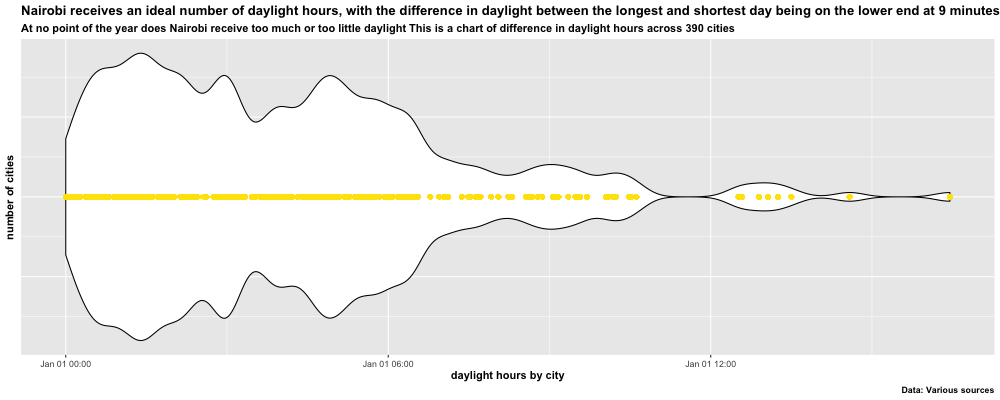

In [42]:
%%R -w 1000 -h 400



# arrows <- 
#   tibble(
#     x1 = c(0),
#     x2 = c(0),
#     y1 = c(1.5), 
#     y2 = c(1.45)
#   )




set.seed(12345)
library(ggplot2)
library(ggbeeswarm)


ggplot(df_sunshine_temp_r) + 
    aes(x=day_diff_datetime, y=1) +
    geom_violin(color='black')+ 
#     geom_point()+ 
#     geom_vline(aes(xintercept=(1900-01-01 07:04:00).to_datetime), color='yellow', size=2)+
#     geom_vline(aes(xintercept=df_r_nrb_sunshine$daylight_diff), color='#8B4000', size=1)+
#     annotate("text", x=3200, y=1.5, label="Difference in daylight hours across cities", angle=360, size=5, color="black") +
#     geom_curve(
#         data = arrows, aes(x = x1, y = y1, xend = x2, yend = y2),
#         arrow = arrow(length = unit(0.08, "inch")), size = 0.5,
#         color = "gray20", curvature = -0.2)+


#     facet_wrap(vars(borough)) + 
    labs(title = "Nairobi receives an ideal number of daylight hours, with the difference in daylight between the longest and shortest day being on the lower end at 9 minutes",
              subtitle = "At no point of the year does Nairobi receive too much or too little daylight This is a chart of difference in daylight hours across 390 cities",
              caption = "Data: Various sources") +
    xlab("daylight hours by city") +
    ylab("number of cities") +
#     geom_text(data=df_r_nrb_sunshine, x=2450, y=1.175, angle=90, color="#8B4000", size=5, aes(label=paste(City, Year)))+
    geom_quasirandom(color='#ffe400') +
    theme(title = element_text(face = "bold"))+
      theme(
#           axis.title.y=element_blank(),
          axis.text.y=element_blank(),  #remove y axis labels
          axis.ticks.y=element_blank()  #remove y axis ticks
            )


In [43]:
df_sunshine_year.Date.head()

0       1 January 2023, Sunday
1       2 January 2023, Monday
2      3 January 2023, Tuesday
3    4 January 2023, Wednesday
4     5 January 2023, Thursday
Name: Date, dtype: object

In [44]:
df_sunshine_temp['Date_no_comma']=df_sunshine_temp.Date.str.replace(',', '')
df_sunshine_temp['Date_no_comma'].sample(10)



43549          24 March 2023 Friday
97469        13 October 2023 Friday
67843    28 September 2023 Thursday
95222       19 August 2023 Saturday
10294         2 March 2023 Thursday
10964                           NaN
25034            9 July 2023 Sunday
21063      23 August 2023 Wednesday
38477          3 May 2023 Wednesday
21904      12 December 2023 Tuesday
Name: Date_no_comma, dtype: object

In [45]:

#for june_dec_duration by scraping

def get_datetime_version(x):
    try:
        datetime_version = pd.to_datetime(x, format='%d %B %Y %A').strftime('%d/%m/%Y')
        return datetime_version
    except:
        pass



df_sunshine_temp['Date_datetime']= df_sunshine_temp.Date_no_comma.apply(get_datetime_version)
df_sunshine_temp['Date_datetime'].sample(10)


36976     25/03/2023
84728     28/11/2023
100714    01/09/2023
672       03/11/2023
103787    29/01/2023
46055     03/02/2023
26749     21/03/2023
72169     27/07/2023
53266     04/11/2023
40472     18/10/2023
Name: Date_datetime, dtype: object

In [46]:
df_sunshine_temp

,key_0,Unnamed: 0.1,Unnamed: 0,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.,Continent,country_url,city_url,naming_country,naming_city,sun_country,sun_city,dec_url_city,dec_raw_html,dec_soup_doc,dec_duration,june_url_city,june_raw_html,june_soup_doc,june_duration,june_dtime,dec_dtime,daylight_diff,year_url_city,Date,Sunrise,Sunset,Day length,all_months_url,Country_temp,City_temp,Jan_temp,Feb_temp,Mar_temp,Apr_temp,May_temp,Jun_temp,Jul_temp,Aug_temp,Sep_temp,Oct_temp,Nov_temp,Dec_temp,Year_temp,Ref._temp,city_temp_lower_temp,country_temp_lower_temp,day_diff_datetime,Date_no_comma,Date_datetime
0,gagnoa,0,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"1 January 2023, Sunday",06:34,18:19,11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,Ivory Coast,Gagnoa,26 (79),27 (81),27 (81),27 (81),27 (81),26 (79),25 (77),25 (77),25 (77),26 (79),26 (79),26 (79),26 (79),[43],gagnoa,ivory coast,1900-01-01 00:42:00,1 January 2023 Sunday,01/01/2023
1,gagnoa,1,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"2 January 2023, Monday",06:35,18:20,11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,Ivory Coast,Gagnoa,26 (79),27 (81),27 (81),27 (81),27 (81),26 (79),25 (77),25 (77),25 (77),26 (79),26 (79),26 (79),26 (79),[43],gagnoa,ivory coast,1900-01-01 00:42:00,2 January 2023 Monday,02/01/2023
2,gagnoa,2,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"3 January 2023, Tuesday",06:35,18:20,11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,Ivory Coast,Gagnoa,26 (79),27 (81),27 (81),27 (81),27 (81),26 (79),25 (77),25 (77),25 (77),26 (79),26 (79),26 (79),26 (79),[43],gagnoa,ivory coast,1900-01-01 00:42:00,3 January 2023 Tuesday,03/01/2023
3,gagnoa,3,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],Africa,ivory-coast,gagnoa,Ivory Coast,Gagnoa,Ivory Coast,Gagnoa,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:44,https://www.sunrise-and-sunset.com/en/sun/ivor...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:26,1900-01-01 12:26:00,1900-01-01 11:44:00,0 days 00:42:00,https://www.sunrise-and-sunset.com/en/sun/ivor...,"4 January 2023, Wednesday",06:36,18:21,11:44,https://www.sunrise

In [47]:

#for june_dec_duration by scraping

def get_int_duration(x):
    try:
#         list_strings_day_length=
        int_hour=float(x.split(":")[0])
        int_minute=float(x.split(":")[1])
        int_min_in_hour=int_minute/60
        int_duration=int_hour+int_min_in_hour
        return int_duration
    except:
        pass







df_sunshine_temp['integer_duration']=df_sunshine_temp['Day length'].apply(get_int_duration)
df_sunshine_temp['integer_duration'].sample(10)

31788     9.433333
45498    13.766667
89353    10.150000
76189    13.233333
84365     9.400000
57678     7.600000
26814    10.666667
88575    14.633333
7716     11.683333
21566    13.333333
Name: integer_duration, dtype: float64

In [48]:
float(df_sunshine_temp['Day length'][0].split(":")[0]) + float(df_sunshine_temp['Day length'][0].split(":")[1])/60

11.733333333333333

In [49]:
n_cities_df=df_sunshine_temp[df_sunshine_temp['City'].str.startswith("N", na=False)]
n_cities_df

,key_0,Unnamed: 0.1,Unnamed: 0,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.,Continent,country_url,city_url,naming_country,naming_city,sun_country,sun_city,dec_url_city,dec_raw_html,dec_soup_doc,dec_duration,june_url_city,june_raw_html,june_soup_doc,june_duration,june_dtime,dec_dtime,daylight_diff,year_url_city,Date,Sunrise,Sunset,Day length,all_months_url,Country_temp,City_temp,Jan_temp,Feb_temp,Mar_temp,Apr_temp,May_temp,Jun_temp,Jul_temp,Aug_temp,Sep_temp,Oct_temp,Nov_temp,Dec_temp,Year_temp,Ref._temp,city_temp_lower_temp,country_temp_lower_temp,day_diff_datetime,Date_no_comma,Date_datetime,integer_duration
3290,NaN,3290,14,Cameroon,N'Gaoundéré,286.4,258.7,235.4,195.5,195.4,165.7,128.0,127.8,139.0,184.0,264.1,291.4,2471.4,[11],Africa,cameroon,NaN,Cameroon,N'Gaoundéré,Cameroon,NaN,NaN,NaN,NaN,error,NaN,NaN,NaN,error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,None,NaN
7309,niamey,7309,29,Niger,Niamey,297.6,263.2,269.7,252.0,279.0,267.0,257.3,235.6,235.6,282.6,282.0,279.0,3203.2,[20],Africa,niger,niamey,Niger,Niamey,Niger,Niamey,https://www.sunrise-and-sunset.com/en/sun/nige...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:18,https://www.sunrise-and-sunset.com/en/sun/nige...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:53,1900-01-01 12:53:00,1900-01-01 11:18:00,0 days 01:35:00,https://www.sunrise-and-sunset.com/en/sun/nige...,"1 January 2023, Sunday",07:15,18:34,11:19,https://www.sunrise-and-sunset.com/en/sun/nige...,Niger,Niamey,24.3 (75.7),27.3 (81.1),30.9 (87.6),33.8 (92.8),34.0 (93.2),31.5 (88.7),29.0 (84.2),27.9 (82.2),29.0 (84.2),30.8 (87.4),27.9 (82.2),25.0 (77.0),29.3 (84.7),[72],niamey,niger,1900-01-01 01:35:00,1 January 2023 Sunday,01/01/2023,11.316667
7310,niamey,7310,29,Niger,Niamey,297.6,263.2,269.7,252.0,279.0,267.0,257.3,235.6,235.6,282.6,282.0,279.0,3203.2,[20],Africa,niger,niamey,Niger,Niamey,Niger,Niamey,https://www.sunrise-and-sunset.com/en/sun/nige...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:18,https://www.sunrise-and-sunset.com/en/sun/nige...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:53,1900-01-01 12:53:00,1900-01-01 11:18:00,0 days 01:35:00,https://www.sunrise-and-sunset.com/en/sun/nige...,"2 January 2023, Monday",07:15,18:35,11:19,https://www.sunrise-and-sunset.com/en/sun/nige...,Niger,Niamey,24.3 (75.7),27.3 (81.1),30.9 (87.6),33.8 (92.8),34.0 (93.2),31.5 (88.7),29.0 (84.2),27.9 (82.2),29.0 (84.2),30.8 (87.4),27.9 (82.2),25.0 (77.0),29.3 (84.7),[72],niamey,niger,1900-01-01 01:35:00,2 January 2023 Monday,02/01/2023,11.316667
7311,niamey,7311,29,Niger,Niamey,297.6,263.2,269.7,252.0,279.0,267.0,257.3,235.6,235.6,282.6,282.0,279.0,3203.2,[20],Africa,niger,niamey,Niger,Niamey,Niger,Niamey,https://www.sunrise-and-sunset.com/en/sun/nige...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",11:18,https://www.sunrise-and-sunset.com/en/sun/nige...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",12:53,1900-01-01 12:53:00,1900-01-01 11:18:00,0 days 01:35:00,https://www.sunrise-and-sunset.com/en/sun/nige...,"3 January 2023, Tuesday",07:16,18:35,11:19,https://www.sunrise-and-sunset.com/en/sun/nige...,Niger,Niamey,24.3 (75.7),27.3 (81.1),30.9 (87.6),33.8 (92.8),34.0 (93.2),31.5 (88.7),29.0 (84.2),27.9 (82.2),29.0 (84.2),30.8 (87.4),27.9 (82.2),25.0 (77.0),29.3 (84.7),[72],niamey,niger,1900-01-01 01:35:00,3 January 2023 Tuesday,03/01/2023,11.316667
7312,niamey,7312,29,Niger,Niamey,297.6,263.2,269.7,252.0,279.0,267.0,257.3,235.6,235.6,282.6,282.0,279.0,3203.2,[20],Africa,niger,niamey,Niger,Niamey,Niger,Niamey,https://www.sunrise-and-sunset.com/en/sun/nige.

In [50]:
n_cities_df.to_csv("n_cities_df.csv")

In [51]:
n_cities_df[n_cities_df.City=="New York City"][['Date_no_comma','integer_duration']].to_csv("newyork.csv")

In [135]:
nairobi_df=n_cities_df[n_cities_df.City=="Nairobi"]

nairobi_df.to_csv("nairobi_df.csv")



newyork_df=n_cities_df[n_cities_df.City=="New York City"]

newyork_df.to_csv("newyork_df.csv")

In [149]:
newyork_df

,key_0,Unnamed: 0.1,Unnamed: 0,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.,Continent,country_url,city_url,naming_country,naming_city,sun_country,sun_city,dec_url_city,dec_raw_html,dec_soup_doc,dec_duration,june_url_city,june_raw_html,june_soup_doc,june_duration,june_dtime,dec_dtime,daylight_diff,year_url_city,Date,Sunrise,Sunset,Day length,all_months_url,Country_temp,City_temp,Jan_temp,Feb_temp,Mar_temp,Apr_temp,May_temp,Jun_temp,Jul_temp,Aug_temp,Sep_temp,Oct_temp,Nov_temp,Dec_temp,Year_temp,Ref._temp,city_temp_lower_temp,country_temp_lower_temp,day_diff_datetime,Date_no_comma,Date_datetime,integer_duration
82936,new-york-city,82936,306,United States,New York City,162.7,163.1,212.5,225.6,256.6,257.3,268.2,268.2,219.3,211.2,151.0,139.0,2534.7,?,North America,united-states,new-york-city,United States,New York City,United States,New York City,https://www.sunrise-and-sunset.com/en/sun/unit...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",09:13,https://www.sunrise-and-sunset.com/en/sun/unit...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",15:03,1900-01-01 15:03:00,1900-01-01 09:13:00,0 days 05:50:00,https://www.sunrise-and-sunset.com/en/sun/unit...,"1 January 2023, Sunday",07:20,16:38,09:17,https://www.sunrise-and-sunset.com/en/sun/unit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 05:50:00,1 January 2023 Sunday,01/01/2023,9.283333
82937,new-york-city,82937,306,United States,New York City,162.7,163.1,212.5,225.6,256.6,257.3,268.2,268.2,219.3,211.2,151.0,139.0,2534.7,?,North America,united-states,new-york-city,United States,New York City,United States,New York City,https://www.sunrise-and-sunset.com/en/sun/unit...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",09:13,https://www.sunrise-and-sunset.com/en/sun/unit...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",15:03,1900-01-01 15:03:00,1900-01-01 09:13:00,0 days 05:50:00,https://www.sunrise-and-sunset.com/en/sun/unit...,"2 January 2023, Monday",07:20,16:39,09:18,https://www.sunrise-and-sunset.com/en/sun/unit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 05:50:00,2 January 2023 Monday,02/01/2023,9.300000
82938,new-york-city,82938,306,United States,New York City,162.7,163.1,212.5,225.6,256.6,257.3,268.2,268.2,219.3,211.2,151.0,139.0,2534.7,?,North America,united-states,new-york-city,United States,New York City,United States,New York City,https://www.sunrise-and-sunset.com/en/sun/unit...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",09:13,https://www.sunrise-and-sunset.com/en/sun/unit...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",15:03,1900-01-01 15:03:00,1900-01-01 09:13:00,0 days 05:50:00,https://www.sunrise-and-sunset.com/en/sun/unit...,"3 January 2023, Tuesday",07:20,16:40,09:19,https://www.sunrise-and-sunset.com/en/sun/unit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 05:50:00,3 January 2023 Tuesday,03/01/2023,9.316667
82939,new-york-city,82939,306,United States,New York City,162.7,163.1,212.5,225.6,256.6,257.3,268.2,268.2,219.3,211.2,151.0,139.0,2534.7,?,North America,united-states,new-york-city,United States,New York City,United States,New York City,https://www.sunrise-and-sunset.com/en/sun/unit...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",09:13,https://www.sunrise-and-sunset.com/en/sun/unit...,"b'<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",15:03,1900-01-01 15:03:00,1900-01-01 09:13:00,0 days 05:50:00,https://www.sunrise-and-sunset.com/en/sun/unit...,"4 Jan

In [142]:
%%R

n_cities_df_r <- read_csv("n_cities_df.csv") 

nairobi_df_r <- read_csv("nairobi_df.csv") 

newyork_df_r <- read_csv("newyork_df.csv") 

New names:
• `` -> `...1`
Rows: 4750 Columns: 66
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (43): key_0, Country, City, Ref., Continent, country_url, city_url, nam...
dbl  (17): ...1, Unnamed: 0.1, Unnamed: 0, Jan, Feb, Mar, Apr, May, Jun, Jul...
dttm  (3): june_dtime, dec_dtime, day_diff_datetime
time  (3): Sunrise, Sunset, Day length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 365 Columns: 66
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (41): key_0, Country, City, Ref., Continent, country_url, city_url, nam...
dbl  (17): ...1, Unnamed: 0.1, Unnamed: 0, Jan, Feb, Mar, Apr, May, Jun, Jul...
dttm  (3): june_dtime, dec_dtime, day_diff_datetime
time  (5): dec_duration, june_duration, Sunrise, Sunset, Day length

ℹ Use `spec()` to retrie

In [190]:
%%R -w 1000 -h 400

# n_cities_df_r[sample(nrow(n_cities_df_r), 7), ]

set.seed(12345)
library(ggplot2)
library(ggbeeswarm)

n_cities_df_r$Date_datetime <- as.Date(n_cities_df_r$Date_datetime,format="%d/%m/%Y")

ggplot(n_cities_df_r,
       aes(x = Date_datetime, y = integer_duration, color = City, group=City)) +
        geom_line()+
        labs(title = "Nairobi receives an ideal number of daylight hours, with the difference in daylight between the longest and shortest day being on the lower end at 9 minutes",
              subtitle = "At no point of the year does Nairobi receive too much or too little daylight This is a chart of difference in daylight hours for a sample of cities starting with N",
              caption = "Data: sunrise-and-sunset.com") +
        xlab("Date") +
        ylab("length of day in hours") +
    theme(title = element_text(face = "bold"))
     


# ggsave("datetime.png")

Saving 13.9 x 5.56 in image


In [184]:
%%R -w 1000 -h 400

# n_cities_df_r[sample(nrow(n_cities_df_r), 7), ]

set.seed(12345)
library(ggplot2)
library(ggbeeswarm)

n_cities_df_r$Date_datetime <- as.Date(n_cities_df_r$Date_datetime,format="%d/%m/%Y")

ggplot(n_cities_df_r, 
       aes(x = Date_datetime, y = integer_duration, color = City, group=City)) +
  geom_line()  

ggsave("datetime.png")

Saving 13.9 x 5.56 in image


In [55]:
# %%R

# n_cities_df_r$Date_datetime

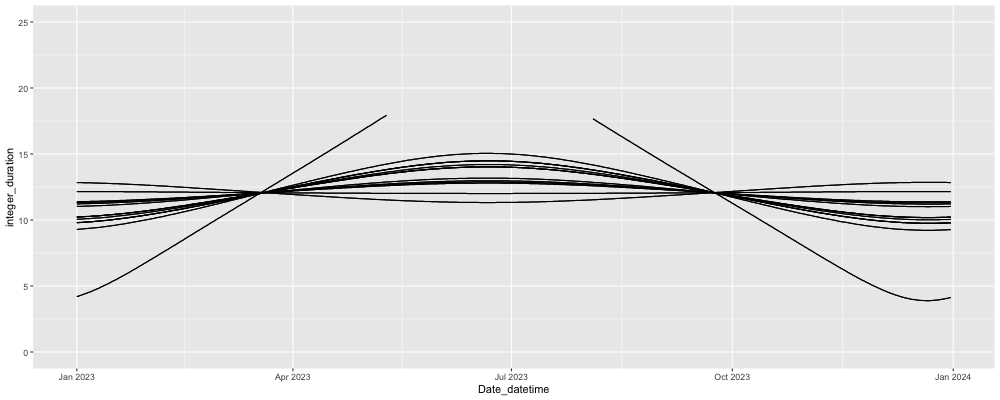

In [183]:
%%R -w 1000 -h 400


set.seed(12345)
library(ggplot2)
library(ggbeeswarm)

n_cities_df_r$Date_datetime <- as.Date(n_cities_df_r$Date_datetime,format="%d/%m/%Y")

ggplot(n_cities_df_r, 
       aes(x = Date_datetime, y = integer_duration, group=City)) +
  geom_line()+
  geom_line(data=n_cities_df_r)+
  ylim(0, 25)

# ggsave("datetime.png")
